In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
import anndata as ad

In [3]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
2022-07-03 15:23:09.673398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 15:23:09.673469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.2 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.5.3 pandas==1.3.4 scikit-learn==1.0.2 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.3 pynndescent==0.5.5


In [4]:
adata = sc.read('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/211015_annot_patient_integrated.h5ad')

In [21]:
# adata = adata[adata.obs.treatment != 'nan']

In [27]:
obs_cols = ['patient', 'treatment', 'cell_type', 'infected']

In [6]:
df = adata.to_df(layer='counts')

In [7]:
%%time
df = df.join(adata.obs[obs_cols], how='inner')

CPU times: user 2min 7s, sys: 17.8 s, total: 2min 25s
Wall time: 2min 25s


In [56]:
%%time
sum_df = df.groupby(obs_cols).sum()
# remove rows that are all 0 bc those samples don't exist
sum_df = sum_df[sum_df.any(axis=1).values]
sum_df

SAMD11  NOC2L  KLHL17  \
patient   treatment cell_type         infected                          
Patient 1 IFNa      Basal             False        0.0   13.0     5.0   
                                      True         0.0    4.0     3.0   
                    Ciliated          False        0.0    0.0     0.0   
                                      True         0.0    0.0     1.0   
                    Club              False        0.0  220.0    44.0   
...                                                ...    ...     ...   
Patient 4 mock      Viral             True         0.0    1.0     0.0   
                    unk               False        0.0    0.0     0.0   
                                      True         0.0    0.0     0.0   
                    unk MT high cells False        0.0    7.0     2.0   
                                      True         0.0   15.0     2.0   

                                                PLEKHN1  PERM1    HES4  \
patient   treatment cell_type         infected                           
Patient 1 IFNa      Basal             False         7.0    0.0   209.0   
                                      True         11.0    1.0   184.0   
                    Ciliated          False         0.0    0.0    23.0   
                                      True          1.0    0.0    65.0   
                    Club              False       195.0   21.0  9209.0   
...                                                 ...    ...     ...   
Patient 4 mock      Viral             True          0.0    0.0    17.0   
                    unk               False         0.0    0.0     5.0   
                                      True          0.0    0.0     0.0   
                    unk MT high cells False         6.0    0.0   197.0   
                                      True         10.0    0.0   204.0   

                                                  ISG15   AGRN  RNF223  \
patient   treatment cell_type         infected                           
Patient 1 IFNa      Basal             False       661.0   40.0     4.0   
                                      True        734.0   38.0     0.0   
                    Ciliated          False        41.0    2.0     0.0   
                                      True        200.0    4.0     0.0   
                    Club              False     15335.0  753.0    81.0   
...                                                 ...    ...     ...   
Patient 4 mock      Viral             True         35.0    3.0     0.0   
                    unk               False         1.0    0.0     0.0   
                                      True          0.0    0.0     0.0   
                    unk MT high cells False       204.0   46.0     0.0   
                                      True        128.0   66.0     3.0   

                                                C1orf159  ...  S-minus  \
patient   treatment cell_type         infected            ...            
Patient 1 IFNa      Basal             False          6.0  ...      0.0   
                                      True           6.0  ...      0.0   
                    Ciliated          False          0.0  ...      0.0   
                                      True           0.0  ...      0.0   
                    Club              False         74.0  ...      0.0   
...                                                  ...  ...      ...   
Patient 4 mock      Viral             True           0.0  ...      6.0   
                    unk               False          1.0  ...      0.0   
                                      True           0.0  ...      0.0   
                    unk MT high cells False         10.0  ...      0.0   
                                      True          16.0  ...      0.0   

                                                ORF3a-minus  E-minus  M-minus  \
patient   treatment cell_type         infected                                  
Patient 1 IFNa      Basal             False    

Write.

In [61]:
save_df = sum_df[adata.var_names[adata.var.used_for_scvi]].T
# save_df = sum_df.T
save_df.columns = sum_df.reset_index()[obs_cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1).values
save_df

,Patient 1-IFNa-Basal-False,Patient 1-IFNa-Basal-True,Patient 1-IFNa-Ciliated-False,Patient 1-IFNa-Ciliated-True,Patient 1-IFNa-Club-False,Patient 1-IFNa-Club-True,Patient 1-IFNa-Goblet-False,Patient 1-IFNa-Goblet-True,Patient 1-IFNa-Ionocytes-False,Patient 1-IFNa-Ionocytes-True,...,Patient 4-mock-Suprabasal-False,Patient 4-mock-Suprabasal-True,Patient 4-mock-Suprabasal prolif.-False,Patient 4-mock-Suprabasal prolif.-True,Patient 4-mock-Viral-False,Patient 4-mock-Viral-True,Patient 4-mock-unk-False,Patient 4-mock-unk-True,Patient 4-mock-unk MT high cells-False,Patient 4-mock-unk MT high cells-True
SAMD11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PLEKHN1,7.0,11.0,0.0,1.0,195.0,205.0,11.0,7.0,1.0,0.0,...,168.0,197.0,11.0,15.0,2.0,0.0,0.0,0.0,6.0,10.0
ISG15,661.0,734.0,41.0,200.0,15335.0,34267.0,421.0,561.0,74.0,59.0,...,1631.0,2601.0,195.0,607.0,3.0,35.0,1.0,0.0,204.0,128.0
AGRN,40.0,38.0,2.0,4.0,753.0,786.0,24.0,30.0,1.0,3.0,...,299.0,358.0,51.0,73.0,4.0,3.0,0.0,0.0,46.0,66.0
TTLL10,0.0,0.0,4.0,2.0,3.0,5.0,0.0,1.0,0.0,0.0,...,6.0,26.0,1.0,1.0,0.0,2.0,0.0,0.0,47.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORF7a-minus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORF7b-minus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ORF8-minus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N-minus,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,10.0,9.0,0.0,2.0,12.0,46.0,0.0,0.0,0.0,1.0


In [62]:
save_df.to_csv('pseudobulk_counts_HVG.csv')

In [59]:
# save "metadata" file
meta = sum_df.reset_index()[obs_cols]
meta.index = meta.apply(lambda row: '-'.join(row.values.astype(str)), axis=1).values
meta

,patient,treatment,cell_type,infected
Patient 1-IFNa-Basal-False,Patient 1,IFNa,Basal,False
Patient 1-IFNa-Basal-True,Patient 1,IFNa,Basal,True
Patient 1-IFNa-Ciliated-False,Patient 1,IFNa,Ciliated,False
Patient 1-IFNa-Ciliated-True,Patient 1,IFNa,Ciliated,True
Patient 1-IFNa-Club-False,Patient 1,IFNa,Club,False
...,...,...,...,...
Patient 4-mock-Viral-True,Patient 4,mock,Viral,True
Patient 4-mock-unk-False,Patient 4,mock,unk,False
Patient 4-mock-unk-True,Patient 4,mock,unk,True
Patient 4-mock-unk MT high cells-False,Patient 4,mock,unk MT high cells,False


In [60]:
meta.to_csv('pseudobulk_metadata.csv')

#### .h5ad.

In [63]:
sum_adata = ad.AnnData(sum_df.values, obs=sum_df.reset_index().iloc[:, :4], var=adata.var)
sum_adata

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 921 × 18115
    obs: 'patient', 'treatment', 'cell_type', 'infected'
    var: 'used_for_scvi'

In [64]:
sum_adata.layers['counts'] = sum_adata.X

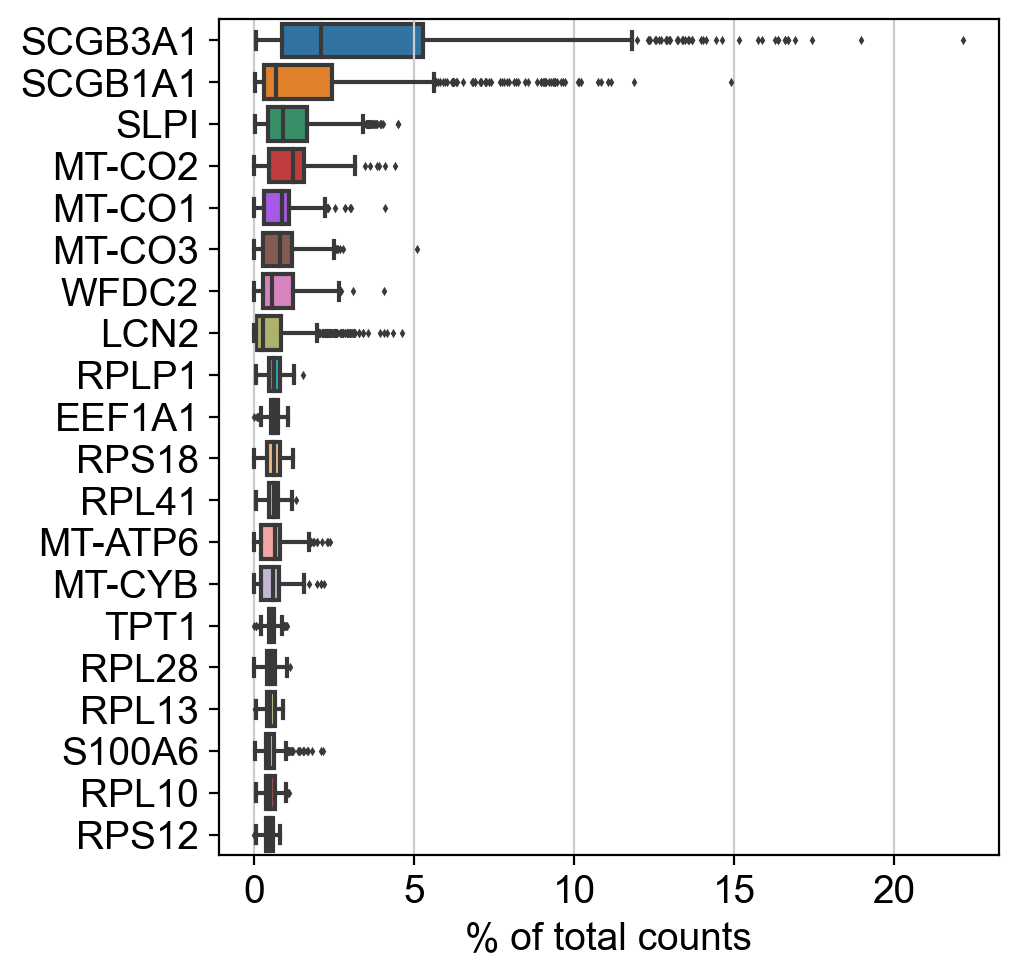

In [65]:
sc.pl.highest_expr_genes(sum_adata, n_top=20, )

## bulk analysis

LogCPM.

In [69]:
sc.pp.normalize_total(sum_adata, target_sum=10e6)
sc.pp.log1p(sum_adata)

PCA with variance explained.

In [72]:
sc.tl.pca(sum_adata)

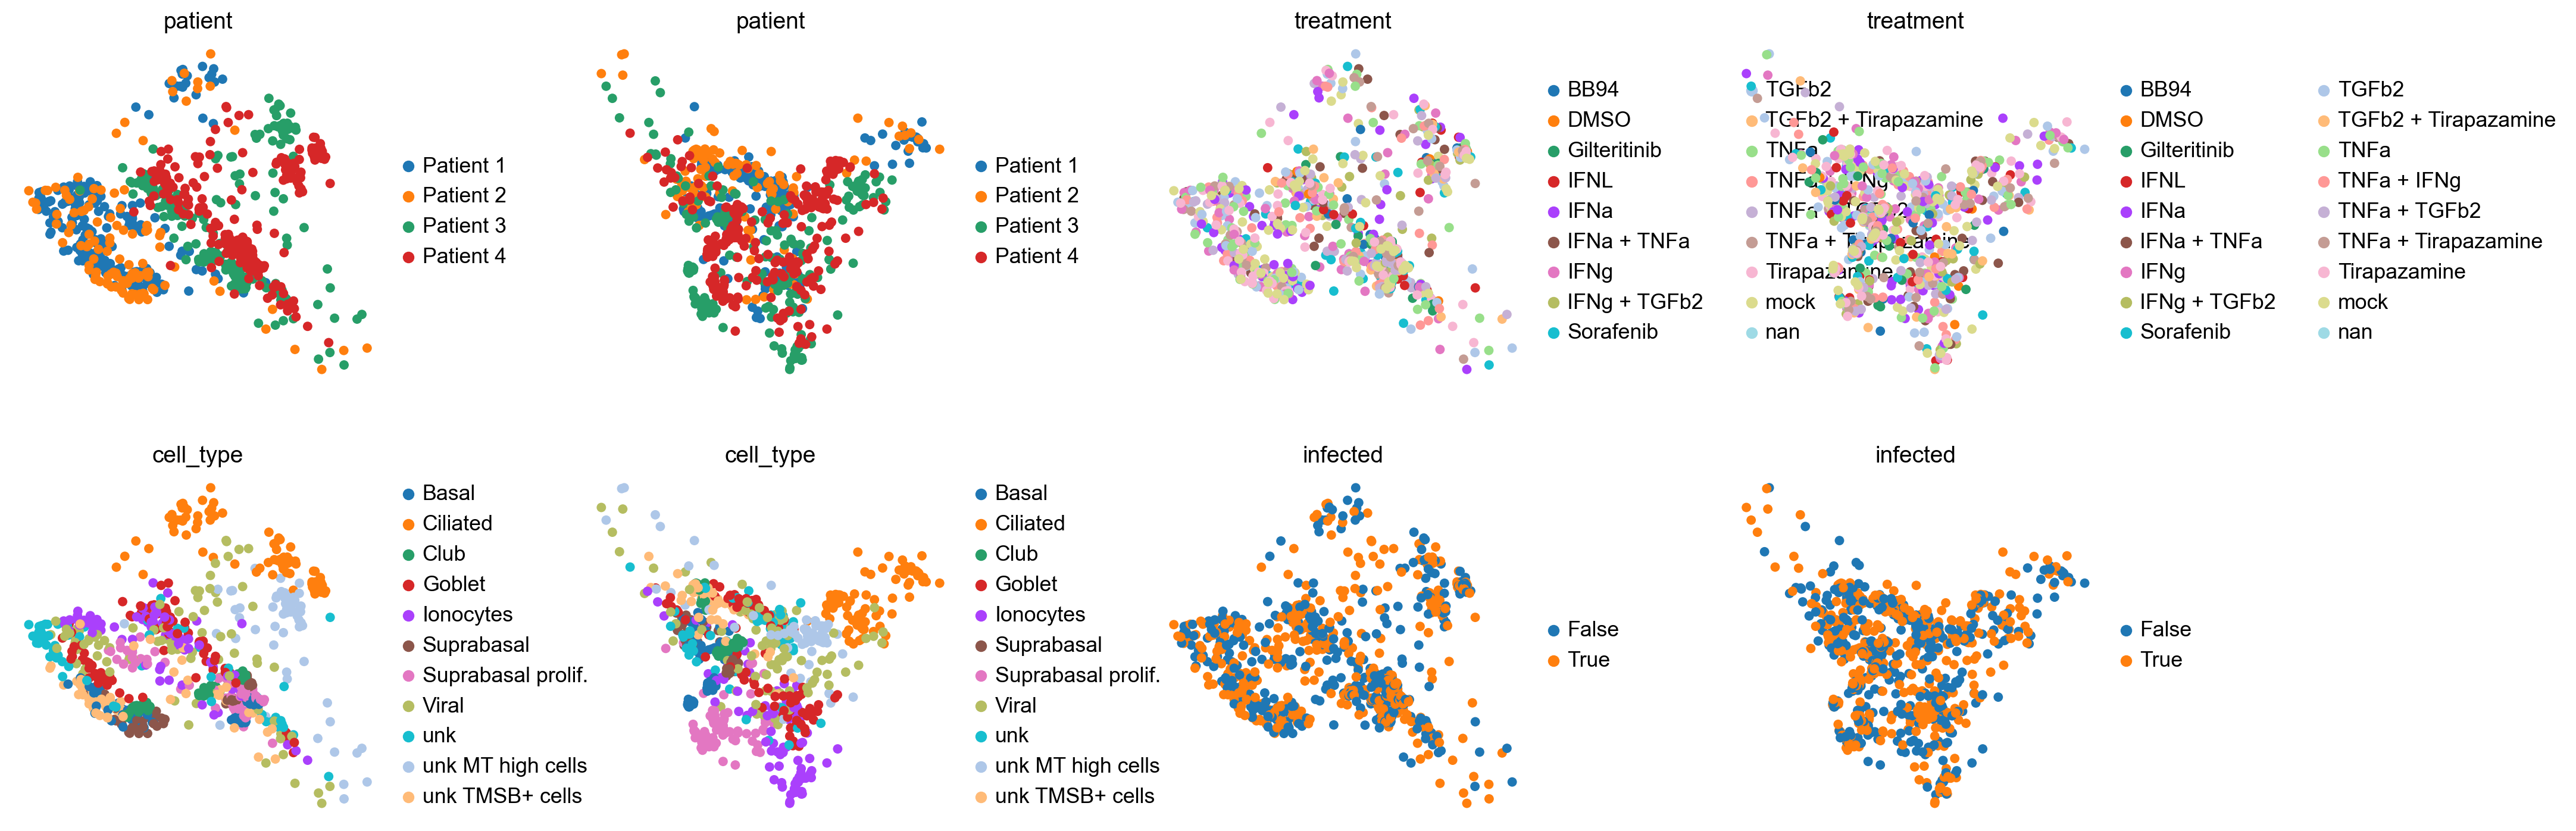

In [82]:
sc.pl.pca(sum_adata, color=obs_cols, ncols=4, wspace=.4, components=['2,3', '3,4'])  # because 1 is batch variation

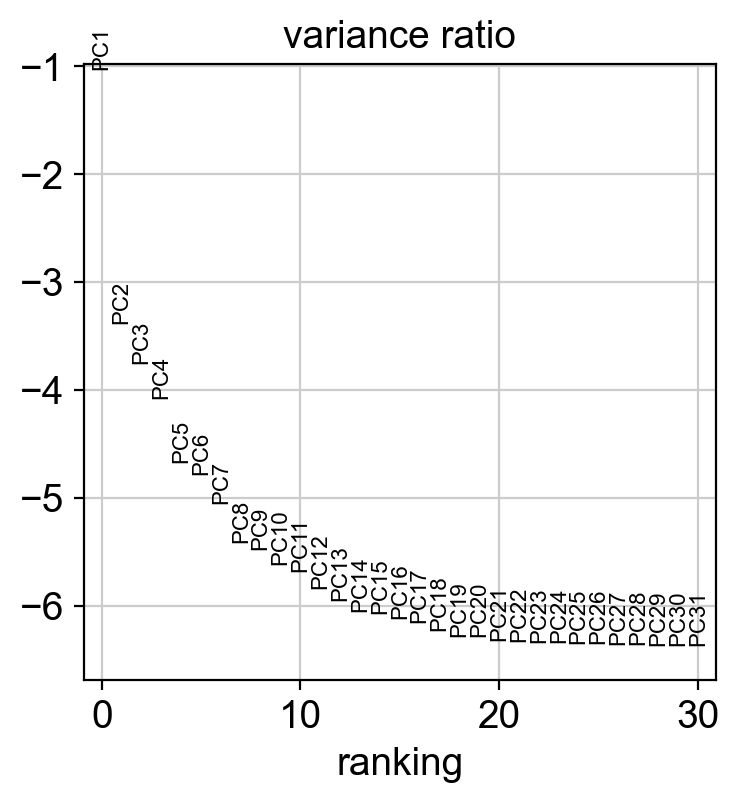

In [79]:
sc.pl.pca_variance_ratio(sum_adata, log=True)

## differential exp

In [89]:
sum_adata = sum_adata[sum_adata.obs.treatment != 'nan']

In [90]:
sc.tl.rank_genes_groups(sum_adata, groupby='treatment', reference='rest')

Trying to set attribute `.uns` of view, copying.
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/iolib/foreign.py:651: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _type_converters = {253 : np.long, 252 : int}


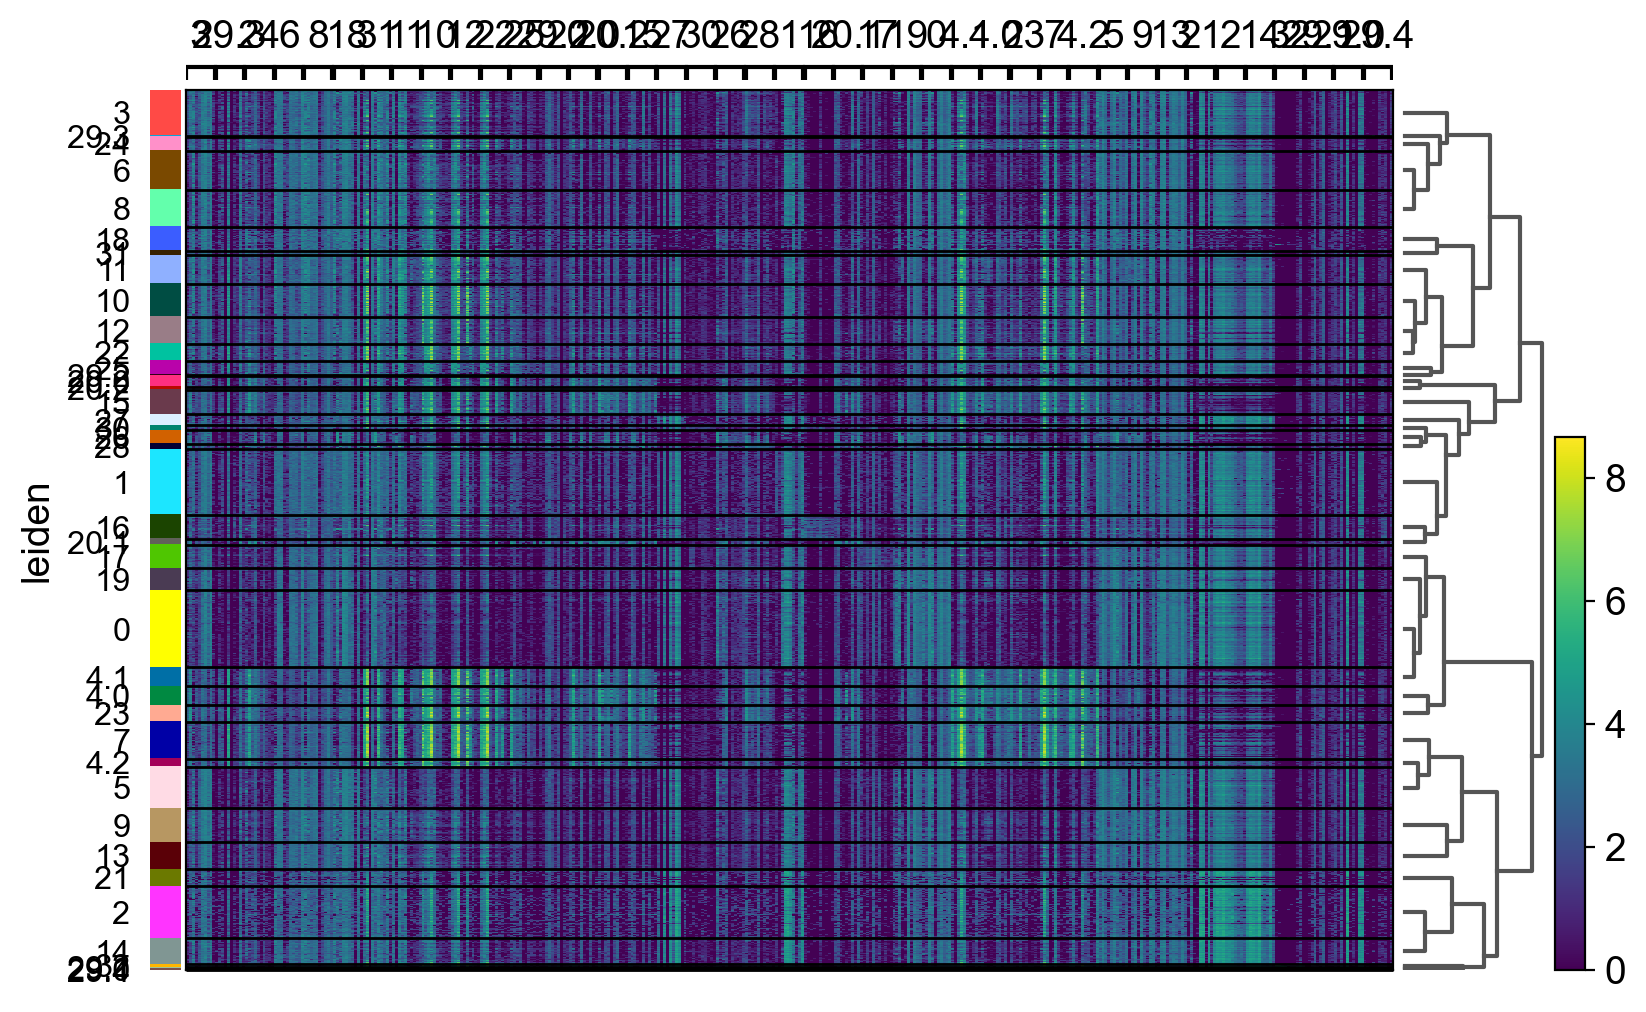

In [92]:
sc.pl.rank_genes_groups_heatmap(adata, cmap='viridis')

In [83]:
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential

linear_model = GLM(family=Gaussian())
# logistic_model = GLM(family=Bernoulli())
# poisson_model = GLM(family=Poisson())
# exponential_model = GLM(family=Exponential())

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,ORF6-minus,ORF7a-minus,ORF7b-minus,ORF8-minus,N-minus,ORF10-minus,patient,treatment,cell_type,infected
0,0.0,5.642401,4.692545,5.026396,0.000000,8.416457,9.567725,6.763936,4.471690,4.873338,...,0.0,0.0,0.000000,3.119105,0.000000,0.000000,Patient 1,IFNa,Basal,False
1,0.0,4.817133,4.532145,5.823573,3.454819,8.637829,10.021270,7.061161,0.000000,5.219898,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 1,IFNa,Basal,True
2,0.0,0.000000,0.000000,0.000000,0.000000,8.343678,8.921652,5.903827,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 1,IFNa,Ciliated,False
3,0.0,0.000000,4.714602,4.714602,0.000000,8.880125,10.003961,6.094151,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 1,IFNa,Ciliated,True
4,0.0,5.082952,3.498017,4.963118,2.790952,8.811189,9.321086,6.308990,4.094359,4.005550,...,0.0,0.0,0.000000,0.000000,1.158521,0.547199,Patient 1,IFNa,Club,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.0,5.702616,0.000000,0.000000,0.000000,8.532683,9.254717,6.799000,0.000000,0.000000,...,0.0,0.0,5.702616,0.000000,9.527987,5.702616,Patient 4,mock,Viral,True
917,0.0,0.000000,0.000000,0.000000,0.000000,8.493876,6.885257,0.000000,0.000000,6.885257,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 4,mock,unk,False
918,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 4,mock,unk,True
919,0.0,4.850525,3.617134,4.697678,0.000000,8.180243,8.215150,6.726601,0.000000,5.204850,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Patient 4,mock,unk MT high cells,False


In [87]:
linear_model.fit(sum_adata.to_df().join(sum_adata.obs[obs_cols], how='inner'), formula="y ~ patient + treatment + cell_type + infected")

PatsyError: Number of rows mismatch between data argument and y (921 versus 1)
    y ~ patient + treatment + cell_type + infected
    ^